<a href="https://colab.research.google.com/github/garima-sagar/Chaotic-Attractors/blob/main/Dogecoin_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df=pd.read_csv('DOGE-USD.csv')
df=df.set_index(pd.DatetimeIndex(df['Date']))
df

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2017-11-09,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550.0
2017-11-10,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520.0
2017-11-11,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080.0
2017-11-12,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960.0
2017-11-13,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270.0
...,...,...,...,...,...,...,...
2022-08-31,2022-08-31,0.061534,0.063333,0.061058,0.061330,0.061330,309748693.0
2022-09-01,2022-09-01,0.061336,0.062479,0.060194,0.062372,0.062372,328765413.0
2022-09-02,2022-09-02,0.062372,0.062712,0.060947,0.061635,0.061635,273453013.0


In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2017-11-09,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550.0
2017-11-10,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520.0
2017-11-11,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080.0
2017-11-12,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960.0
2017-11-13,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270.0


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2022-08-31,2022-08-31,0.061534,0.063333,0.061058,0.061330,0.061330,309748693.0
2022-09-01,2022-09-01,0.061336,0.062479,0.060194,0.062372,0.062372,328765413.0
2022-09-02,2022-09-02,0.062372,0.062712,0.060947,0.061635,0.061635,273453013.0
2022-09-03,2022-09-03,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-04,2022-09-04,0.062682,0.062744,0.062667,0.062696,0.062696,297513408.0


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1.760000e+03
mean,0.059575,0.063096,0.056126,0.059619,0.059619,1.016258e+09
std,0.101325,0.109152,0.093695,0.101379,0.101379,3.563999e+09
min,0.001046,0.001210,0.001002,0.001038,0.001038,1.431720e+06
25%,0.002550,0.002616,0.002500,0.002548,0.002548,2.307671e+07
50%,0.003476,0.003603,0.003356,0.003495,0.003495,8.981855e+07
75%,0.070633,0.075035,0.068478,0.070657,0.070657,6.565853e+08
max,0.687801,0.737567,0.608168,0.684777,0.684777,6.941068e+10


In [ ]:
df.corr()

<ipython-input-6-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.993904,0.993707,0.992514,0.992514,0.554850
High,0.993904,1.000000,0.986497,0.995104,0.995104,0.619321
Low,0.993707,0.986497,1.000000,0.994575,0.994575,0.519991
Close,0.992514,0.995104,0.994575,1.000000,1.000000,0.588678
Adj Close,0.992514,0.995104,0.994575,1.000000,1.000000,0.588678
Volume,0.554850,0.619321,0.519991,0.588678,0.588678,1.000000


In [ ]:
df=df[['Open','High','Low','Close','Volume']]
df=df.dropna()
df

,Open,High,Low,Close,Volume
Date,,,,,
2017-11-09,0.001207,0.001415,0.001181,0.001415,6259550.0
2017-11-10,0.001421,0.001431,0.001125,0.001163,4246520.0
2017-11-11,0.001146,0.001257,0.001141,0.001201,2231080.0
2017-11-12,0.001189,0.001210,0.001002,0.001038,3288960.0
2017-11-13,0.001046,0.001212,0.001019,0.001211,2481270.0
...,...,...,...,...,...
2022-08-30,0.063899,0.064408,0.060550,0.061525,328934727.0
2022-08-31,0.061534,0.063333,0.061058,0.061330,309748693.0
2022-09-01,0.061336,0.062479,0.060194,0.062372,328765413.0


In [ ]:
predictdays=1
df['Prediction']=df[['Close']].shift(-predictdays)
df

,Open,High,Low,Close,Volume,Prediction
Date,,,,,,
2017-11-09,0.001207,0.001415,0.001181,0.001415,6259550.0,0.001163
2017-11-10,0.001421,0.001431,0.001125,0.001163,4246520.0,0.001201
2017-11-11,0.001146,0.001257,0.001141,0.001201,2231080.0,0.001038
2017-11-12,0.001189,0.001210,0.001002,0.001038,3288960.0,0.001211
2017-11-13,0.001046,0.001212,0.001019,0.001211,2481270.0,0.001184
...,...,...,...,...,...,...
2022-08-30,0.063899,0.064408,0.060550,0.061525,328934727.0,0.061330
2022-08-31,0.061534,0.063333,0.061058,0.061330,309748693.0,0.062372
2022-09-01,0.061336,0.062479,0.060194,0.062372,328765413.0,0.061635


In [ ]:
x=np.array(df.drop(['Prediction'],1))
x=x[:len(df)-predictdays]
print(x)

[[1.20700000e-03 1.41500000e-03 1.18100000e-03 1.41500000e-03
  6.25955000e+06]
 [1.42100000e-03 1.43100000e-03 1.12500000e-03 1.16300000e-03
  4.24652000e+06]
 [1.14600000e-03 1.25700000e-03 1.14100000e-03 1.20100000e-03
  2.23108000e+06]
 ...
 [6.15340000e-02 6.33330000e-02 6.10580000e-02 6.13300000e-02
  3.09748693e+08]
 [6.13360000e-02 6.24790000e-02 6.01940000e-02 6.23720000e-02
  3.28765413e+08]
 [6.23720000e-02 6.27120000e-02 6.09470000e-02 6.16350000e-02
  2.73453013e+08]]


<ipython-input-9-41e207defc48>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x=np.array(df.drop(['Prediction'],1))


In [ ]:
y=np.array(df['Prediction'])
y=y[:len(df)-predictdays]
print(y)

[0.001163 0.001201 0.001038 ... 0.062372 0.061635 0.062696]


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
rf_model=RandomForestRegressor(n_estimators=100,random_state=42)
rf_model.fit(x_train,y_train)
print(rf_model.score(x_test,y_test))

0.9882175855909675


In [ ]:
prediction=rf_model.predict(x_test)
print(prediction)
print()
print(y_test)

[0.14791974 0.0023746  0.34249791 0.00281017 0.00564342 0.00206932
 0.20612908 0.00205463 0.07371363 0.14862639 0.20561633 0.00250915
 0.00199834 0.00416027 0.00252794 0.00214408 0.0027353  0.00203237
 0.31615689 0.00256049 0.21752075 0.00843977 0.00567095 0.0662681
 0.16714671 0.00347572 0.00236915 0.00252121 0.00235508 0.03885803
 0.24761645 0.08237645 0.15893234 0.00286021 0.00247109 0.3304486
 0.00446229 0.00325448 0.00199387 0.00273524 0.00284884 0.23384958
 0.14929265 0.07556797 0.00207173 0.00226781 0.00355708 0.00224677
 0.00234876 0.00237377 0.17364728 0.00329706 0.00428072 0.18310267
 0.00288743 0.29170615 0.00313852 0.00263798 0.00256362 0.00224255
 0.26474142 0.24551187 0.01536934 0.00247965 0.00673966 0.00172503
 0.24805025 0.00309342 0.00194658 0.00378065 0.00263455 0.00245055
 0.2510438  0.00201931 0.00228049 0.31160472 0.00295273 0.05834664
 0.00209307 0.17034258 0.00284449 0.11434097 0.00287117 0.05235233
 0.00231514 0.00308013 0.00437294 0.05333231 0.00250177 0.002387

In [ ]:
temp_df=df[:-predictdays-1]
x_val = temp_df.tail(1)[['Open', 'High', 'Low', 'Close', 'Volume']].values[0]
print(x_val)

[6.13360000e-02 6.24790000e-02 6.01940000e-02 6.23720000e-02
 3.28765413e+08]


In [ ]:
pred=rf_model.predict([x_val])
print('predicted price is',pred)
print('actual price was',df.tail(2)['Prediction'][0])

predicted price is [0.06260577]
actual price was 0.062696


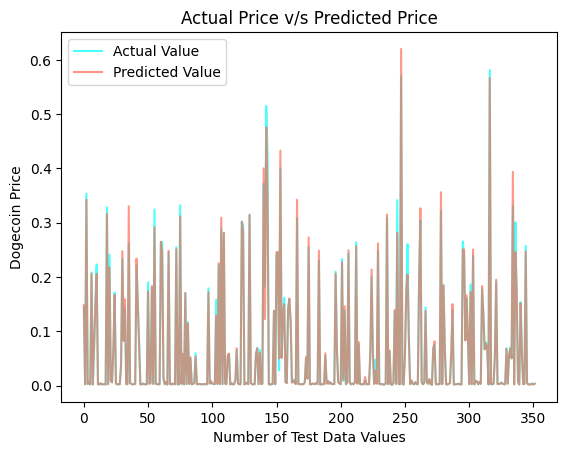

In [ ]:
plt.plot(y_test, color='cyan', label='Actual Value', alpha=0.7)
plt.plot(prediction, color='tomato', label='Predicted Value', alpha=0.65)
plt.title('Actual Price v/s Predicted Price')
plt.xlabel('Number of Test Data Values')
plt.ylabel('Dogecoin Price')
plt.legend()
plt.show()

In [ ]:
mse = mean_squared_error(y_test, prediction)
r2 = r2_score(y_test, prediction)
print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2) Score: {r2}')

Mean Squared Error: 0.00013567011342473334
R-squared (R2) Score: 0.9882175855909675
